# 4. Statistical analysis of time series

In [1]:
import pandas as pd
import os

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

In [4]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)

    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_symbol = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                     parse_dates=True, usecols=['Date', 'Adj Close'],
                     na_values=['nan'])
        df_symbol = df_symbol.rename(columns={'Adj Close': symbol})
        df = df.join(df_symbol, how='inner')

    return df

## Usual statistics

In [5]:
start_date = '2019-01-01'
end_date = '2020-06-01'
dates = pd.date_range(start_date, end_date)

In [6]:
df = get_data(['AAPL', 'GOOG'], dates)

In [7]:
df.mean()

SPY      298.113714
AAPL     230.521529
GOOG    1245.137817
dtype: float64

In [8]:
df.std()

SPY      17.410264
AAPL     45.444601
GOOG    114.783889
dtype: float64

## Rolling statistics 

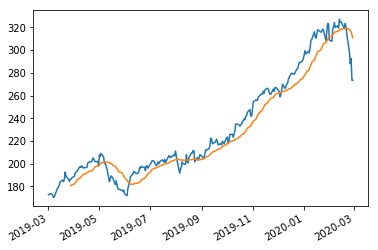

In [9]:
df['AAPL'].plot()
df['AAPL'].rolling(20).mean().plot()

## Bollinger Bands

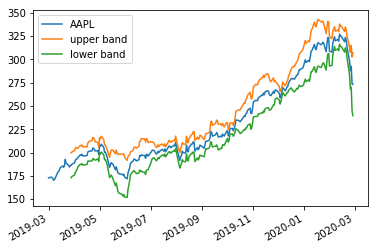

In [10]:
df['AAPL'].plot()
std = df['AAPL'].rolling(20).std()
plot((df['AAPL'] + 2 * std), label='upper band')
plot((df['AAPL'] - 2 * std), label='lower band')
legend()

## Daily returns

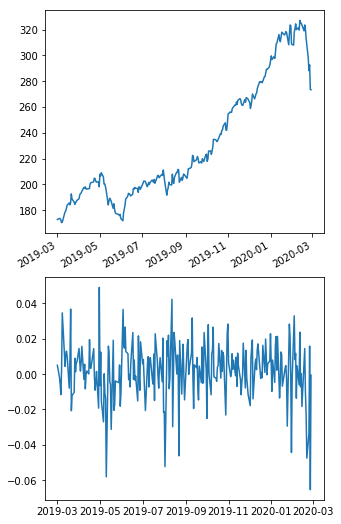

In [12]:
figsize(5, 10)

subplot(2, 1, 1)
df['AAPL'].plot()

subplot(2, 1, 2)
daily_rets = df['AAPL'].shift(-1) / df['AAPL'] - 1
plot(daily_rets)

## Cumilative returns

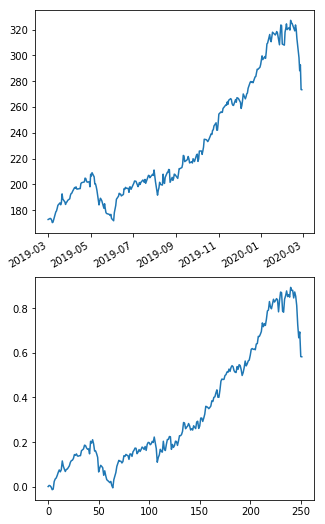

In [13]:
figsize(5, 10)

subplot(2, 1, 1)
df['AAPL'].plot()

subplot(2, 1, 2)
plot(df['AAPL'].values / df['AAPL'][0] - 1)